# Business Problem

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

In [1]:
import numpy as np
import pandas as pd
df1=pd.read_csv(r'C:\Users\chapp\Downloads\walmart_data.csv')

In [2]:
df1.head(5)

,"User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase"
0,"1000001,P00069042,F,0-17,10,A,2,0,3,8370"
1,"1000001,P00248942,F,0-17,10,A,2,0,1,15200"
2,"1000001,P00087842,F,0-17,10,A,2,0,12,1422"
3,"1000001,P00085442,F,0-17,10,A,2,0,12,1057"
4,"1000002,P00285442,M,55+,16,C,4+,0,8,7969"


In [3]:
df1.columns

Index(['User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase'], dtype='object')

In [4]:
columns1=list(df1.columns)[0].split(",")
columns1

['User_ID',
 'Product_ID',
 'Gender',
 'Age',
 'Occupation',
 'City_Category',
 'Stay_In_Current_City_Years',
 'Marital_Status',
 'Product_Category',
 'Purchase']

In [5]:
l=[]
for i in range(len(df1)):
    v=list(df1.loc[i,:])
    l.append(v[0].split(","))
    
df=pd.DataFrame(l,columns=columns1)
df.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [6]:
df.shape

(550068, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
User_ID                       550068 non-null object
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null object
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null object
Product_Category              550068 non-null object
Purchase                      550068 non-null object
dtypes: object(10)
memory usage: 42.0+ MB


In [8]:
df['Purchase']=df['Purchase'].astype(int)

In [9]:
#checking null values 
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [10]:
df.isnull().sum()/len(df)*100


User_ID                       0.0
Product_ID                    0.0
Gender                        0.0
Age                           0.0
Occupation                    0.0
City_Category                 0.0
Stay_In_Current_City_Years    0.0
Marital_Status                0.0
Product_Category              0.0
Purchase                      0.0
dtype: float64

In [11]:
df['User_ID'].nunique()


5891

In [12]:
df.groupby(['Gender'])['User_ID'].nunique()


Gender
F    1666
M    4225
Name: User_ID, dtype: int64

In [13]:
df.describe()


,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


In [14]:
df.groupby(['Gender'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
M,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0


In [15]:
import seaborn as sbn
sbn.boxplot(x='Gender', y='Purchase', data=df)


<AxesSubplot:xlabel='Gender', ylabel='Purchase'>

# Male has more median purchasing power

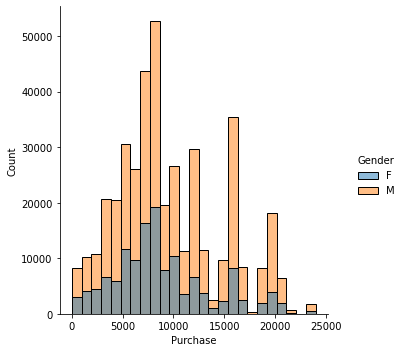

In [16]:
sbn.displot( x='Purchase', data=df, hue='Gender', bins=25)

In [17]:
df.sample(300).groupby(['Gender'])['Purchase'].describe()


,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,56.0,8788.964286,4752.869323,1089.0,5782.5,7876.0,9973.75,20613.0
M,244.0,9531.377049,5200.332437,50.0,5961.5,8101.5,12102.50,23958.0


In [18]:
df.sample(300).groupby(['Gender'])['Purchase'].mean()

Gender
F    8030.151163
M    9284.149533
Name: Purchase, dtype: float64

In [19]:
dfmale=np.array(df[df['Gender']=='M']['Purchase'])
#type(dfmale)
dfmale

array([ 7969, 15227, 19215, ...,   494,   473,   368])

In [20]:
maleexpensemean=[df[df['Gender']=='M']['Purchase'].sample(300).mean() for i in range(1000)]


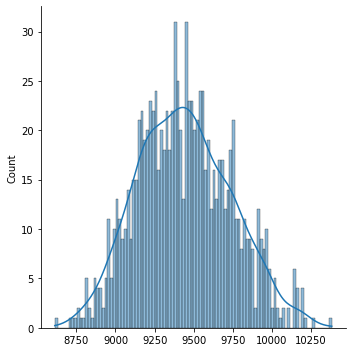

In [21]:
sbn.displot(maleexpensemean,bins=100, kde=True)


In [22]:
#x bar of male expenses mean
mx=np.array(maleexpensemean).mean()
mx

9440.340713333335

In [23]:
#std of male expenses mean
mstd=np.array(maleexpensemean).std()
mstd

297.5574915558001

In [24]:
# 95% confidence interval for male expenses
v=(mx-1.96*(mstd/np.sqrt(1000)),mx+1.96*(mstd/np.sqrt(1000)))
print("(lower limit,upperlimit):",v)

(lower limit,upperlimit): (9421.897908933346, 9458.783517733324)


In [25]:
femaleexpensemean=[df[df['Gender']=='F']['Purchase'].sample(300).mean() for i in range(1000)]


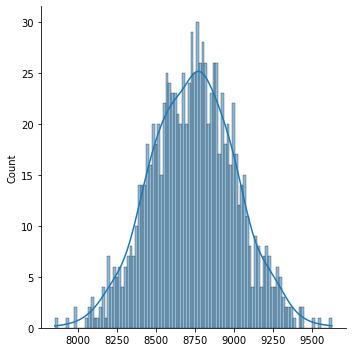

In [26]:
sbn.displot(femaleexpensemean,bins=100, kde=True)

In [27]:
#x bar of female expenses mean
femx=np.array(femaleexpensemean).mean()
femx

8739.114596666668

In [28]:
#std of female expenses mean
femstd=np.array(femaleexpensemean).std()
femstd

271.3767186897489

In [29]:
# 95% confidence interval for female expenses
v=(femx-1.96*(femstd/np.sqrt(1000)),femx+1.96*(femstd/np.sqrt(1000)))
print("(lower limit,upperlimit):",v)

(lower limit,upperlimit): (8722.294493380621, 8755.934699952715)


# There is no overlapping between male and female spending and male have higher starting and ending Purchasing range

In [30]:
df[df['Gender']=='M']['Product_Category'].value_counts()

1     115547
5     108972
8      80367
11     19548
2      18206
6      15907
3      14207
4       8114
16      7426
15      5244
13      4087
10      3963
7       2778
18      2743
12      2415
20      1827
19      1152
14       900
17       516
9        340
Name: Product_Category, dtype: int64

In [31]:
df[df['Gender']=='M']['City_Category'].value_counts()

B    173377
C    128866
A    112016
Name: City_Category, dtype: int64

In [32]:
dfmarried=np.array(df[df['Marital_Status']=='1']['Purchase'])

In [33]:
mariedexpensemean=[df[df['Marital_Status']=='1']['Purchase'].sample(300).mean() for i in range(1000)]


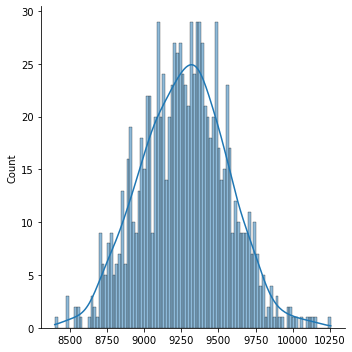

In [34]:
sbn.displot(mariedexpensemean,bins=100, kde=True)

In [35]:
#std of married expenses mean
mariedexpensestd=np.array(mariedexpensemean).std()
mariedexpensestd

288.6900253649099

In [36]:
# 95% confidence interval for mariedexpense
v=(np.array(mariedexpensemean).mean()-1.96*(mariedexpensestd/np.sqrt(1000)),np.array(mariedexpensemean).mean()+1.96*(mariedexpensestd/np.sqrt(1000)))
print("(lower limit,upperlimit):",v)

(lower limit,upperlimit): (9251.403863515337, 9287.190249817995)


In [37]:
dfnotmarried=np.array(df[df['Marital_Status']=='0']['Purchase'])

In [38]:
notmariedexpensemean=[df[df['Marital_Status']=='0']['Purchase'].sample(300).mean() for i in range(1000)]


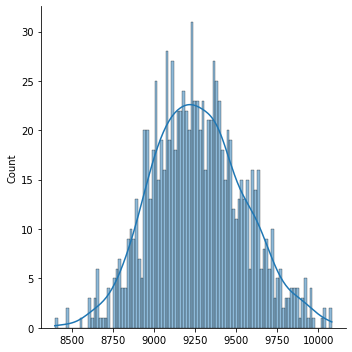

In [39]:
sbn.displot(notmariedexpensemean,bins=100, kde=True)

In [40]:
#std of notmarried expenses mean
notmariedexpensestd=np.array(notmariedexpensemean).std()
notmariedexpensestd

281.1206946112804

In [41]:
# 95% confidence interval for notmariedexpense
v=(np.array(notmariedexpensemean).mean()-1.96*(notmariedexpensestd/np.sqrt(1000)),np.array(notmariedexpensemean).mean()+1.96*(notmariedexpensestd/np.sqrt(1000)))
print("(lower limit,upperlimit):",v)

(lower limit,upperlimit): (9249.872115496011, 9284.72019783732)


#There is overlap between married and unmarried expenses in range (9246.80037498238, 9263.503800463941) and unmarried people have high starting and ending purchasing power

In [42]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [43]:
# dataframe below17
below17=[df[df['Age']=='0-17']['Purchase']]

In [44]:
below17mean=[df[df['Age']=='0-17']['Purchase'].sample(300).mean() for i in range(1000)]


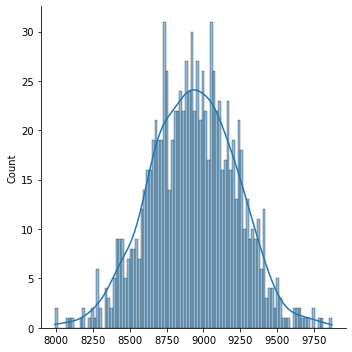

In [45]:
sbn.displot(below17mean,bins=100, kde=True)

In [46]:
#std of below17 expenses mean
below17expensestd=np.array(below17mean).std()
below17expensestd

293.53105879458207

In [47]:
# 95% confidence interval for below17expense
v=(np.array(below17mean).mean()-1.96*(below17expensestd/np.sqrt(1000)),np.array(below17mean).mean()+1.96*(below17expensestd/np.sqrt(1000)))
print("(lower limit,upperlimit):",v)

(lower limit,upperlimit): (8912.06196315475, 8948.448450178583)


In [48]:
#dataframe of expenses between 18 to 25

In [49]:
between18to25=[df[df['Age']=='18-25']['Purchase']]

In [50]:
between18to25mean=[df[df['Age']=='18-25']['Purchase'].sample(300).mean() for i in range(1000)]


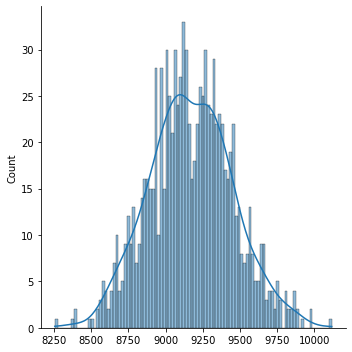

In [51]:
sbn.displot(between18to25mean,bins=100, kde=True)

In [52]:
#std of between18to25 expenses mean
between18to25std=np.array(between18to25mean).std()
between18to25std

280.6321960813303

In [53]:
# 95% confidence interval for between18to25
v=(np.array(between18to25mean).mean()-1.96*(between18to25std/np.sqrt(1000)),np.array(between18to25mean).mean()+1.96*(between18to25std/np.sqrt(1000)))
print("(lower limit,upperlimit):",v)

(lower limit,upperlimit): (9154.174039615253, 9188.961567051418)


In [54]:
#df of age between 26-35

In [55]:
between26to35=[df[df['Age']=='26-35']['Purchase']]

In [56]:
between26to35mean=[df[df['Age']=='26-35']['Purchase'].sample(300).mean() for i in range(1000)]
between26to35mean

[8759.21,
 9206.686666666666,
 9441.096666666666,
 9971.02,
 8930.193333333333,
 9027.443333333333,
 9067.79,
 9241.61,
 9507.21,
 9529.446666666667,
 9698.046666666667,
 9145.563333333334,
 9239.56,
 9249.893333333333,
 8730.433333333332,
 9023.01,
 10348.233333333334,
 9252.556666666667,
 8882.413333333334,
 10067.37,
 9215.98,
 9463.733333333334,
 9545.22,
 9115.966666666667,
 9146.28,
 9145.803333333333,
 9274.826666666666,
 9153.853333333333,
 9335.67,
 9139.393333333333,
 9371.813333333334,
 9456.886666666667,
 8951.936666666666,
 9365.793333333333,
 9217.616666666667,
 9217.943333333333,
 8831.786666666667,
 9413.11,
 9354.133333333333,
 9192.083333333334,
 9606.49,
 9155.883333333333,
 9252.033333333333,
 9272.51,
 9110.59,
 9297.813333333334,
 9551.813333333334,
 9585.973333333333,
 9611.846666666666,
 9299.22,
 8567.16,
 9321.843333333334,
 9262.836666666666,
 10087.236666666666,
 9381.826666666666,
 9013.923333333334,
 9324.94,
 9739.9,
 9557.7,
 9369.933333333332,
 9684.336

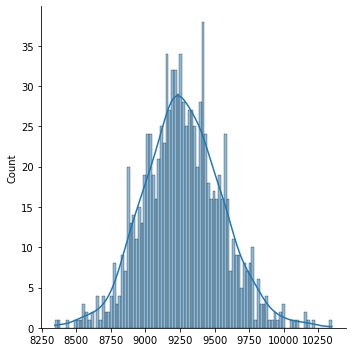

In [57]:
sbn.displot(between26to35mean,bins=100, kde=True)

In [58]:
#std of between26to35 expenses mean
between26to35std=np.array(between26to35mean).std()
between26to35std

285.23685253570807

In [59]:
# 95% confidence interval for between26to35
v=(np.array(between26to35mean).mean()-1.96*(between26to35std/np.sqrt(1000)),np.array(between26to35mean).mean()+1.96*(between26to35std/np.sqrt(1000)))
print("(lower limit,upperlimit):",v)

(lower limit,upperlimit): (9254.795376718042, 9290.153703281956)


In [60]:
#df between '36-45'
between26to35=[df[df['Age']=='36-45']['Purchase']]

In [61]:
between36to45mean=[df[df['Age']=='36-45']['Purchase'].sample(300).mean() for i in range(1000)]


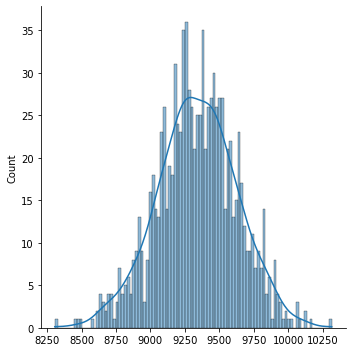

In [62]:
sbn.displot(between36to45mean,bins=100, kde=True)

In [63]:
#std of between36to45 expenses mean
between36to45std=np.array(between36to45mean).std()
between36to45std

288.92719520999134

In [64]:
# 95% confidence interval for between36to45
v=(np.array(between36to45mean).mean()-1.96*(between36to45std/np.sqrt(1000)),np.array(between36to45mean).mean()+1.96*(between36to45std/np.sqrt(1000)))
print("(lower limit,upperlimit):",v)

(lower limit,upperlimit): (9320.633410242712, 9356.449196423955)


In [65]:
#df of age between 46-50
between26to35=[df[df['Age']=='46-50']['Purchase']]

In [66]:
between46to50mean=[df[df['Age']=='46-50']['Purchase'].sample(300).mean() for i in range(1000)]


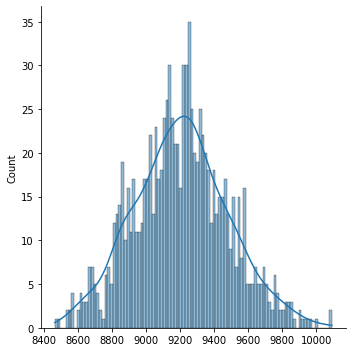

In [67]:
sbn.displot(between46to50mean,bins=100, kde=True)

In [68]:
#std of between46to50 expenses mean
between46to50std=np.array(between46to50mean).std()
between46to50std

277.495413019108

In [69]:
# 95% confidence interval for between46to50
v=(np.array(between46to50mean).mean()-1.96*(between46to50std/np.sqrt(1000)),np.array(between46to50mean).mean()+1.96*(between46to50std/np.sqrt(1000)))
print("(lower limit,upperlimit):",v)

(lower limit,upperlimit): (9187.758452777032, 9222.157140556303)


In [70]:
#df of age between '51-55'
between51to55=[df[df['Age']=='51-55']['Purchase']]

In [71]:
between51to55mean=[df[df['Age']=='51-55']['Purchase'].sample(300).mean() for i in range(1000)]

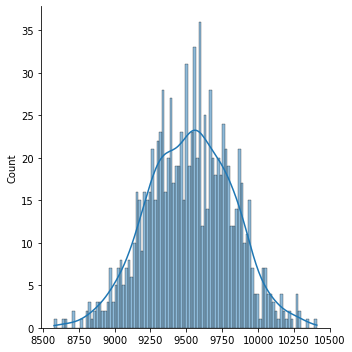

In [72]:
sbn.displot(between51to55mean,bins=100, kde=True)

In [73]:
#std of between51to55 expenses mean
between51to55std=np.array(between51to55mean).std()
between51to55std

294.7158918004292

In [74]:
# 95% confidence interval for between51to55
v=(np.array(between51to55mean).mean()-1.96*(between51to55std/np.sqrt(1000)),np.array(between51to55mean).mean()+1.96*(between51to55std/np.sqrt(1000)))
print("(lower limit,upperlimit):",v)

(lower limit,upperlimit): (9508.018699777553, 9544.552060222446)


In [75]:
# Age 55+ dataframe
between51to55=[df[df['Age']=='55+']['Purchase']]

In [76]:
between55plusmean=[df[df['Age']=='55+']['Purchase'].sample(300).mean() for i in range(1000)]


In [ ]:
# sbn.displot(between55plusmean,bins=100, kde=True)

In [77]:
#std of age 55+ expenses mean
between55plusstd=np.array(between55plusmean).std()
between55plusstd

287.1748491602154

In [78]:
# 95% confidence interval for between55plus
v=(np.array(between55plusmean).mean()-1.96*(between55plusstd/np.sqrt(1000)),np.array(between55plusmean).mean()+1.96*(between55plusstd/np.sqrt(1000)))
print("(lower limit,upperlimit):",v)

(lower limit,upperlimit): (9301.355805109459, 9336.954368223873)


In [79]:
# Purchasing of age groups increases from 17 to(36 to 45) and then there is variation

Recommendations:

1. As male customers has more purchasing range compared to female customers, products which are more purchased by men like 1,5,8 need to be kept more in stock.                                                                                        
2. Stores in type of city "B" should have more reserves of best selling items which would help to maintain consistency.